In [1]:
# Загружаем наш дата сет. Мы имеем дата сет из 11 колонок (fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, alcohol, quality) и 1599 строк. Крайний столбец quality выступает как классификатор.

In [2]:
# Загружаем необходимые библиотеки для начала работы (Numpy, Matplotlib.pyplot, Pandas)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Загружаем дата сет в формате сsv, разделитель запятые.
df = pd.read_csv('vino2.csv')

In [4]:
# Проверяем как загрузился дата сет.
df

,fixedacidity,volatileacidity,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [5]:
# Проводим шкалирование для всех наших данных. Используем MinMaxScaler для отображения данных 1/0.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['fixedacidity','volatileacidity','residualsugar','chlorides','freesulfurdioxide','totalsulfurdioxide','density','pH','sulphates','alcohol','quality']).round()

,fixedacidity,volatileacidity,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1595,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


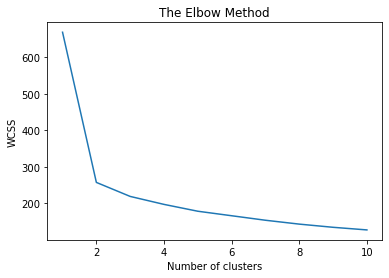

In [6]:
# Строим метод локтя для определения необходимого количества кластеров.
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

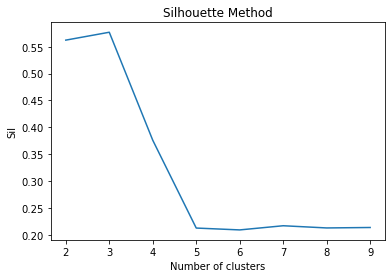

2:0.5623476721955023
3:0.5770275676854574
4:0.3759268699122092
5:0.21237086952499387
6:0.20890366506363903
7:0.21667253905898906
8:0.21258445097113424
9:0.2134103522018541


In [7]:
# Используем метод силуэта для определения необходимого количества кластеров. Исходя из полученных данных получаем следующее: оптимальный набор кластеров является число 3 ,близкое к нему значение 2. Однако мы будем использовать 4 кластера.
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 10), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [8]:
# Применяем алгоритм К-средник для наших данных.
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['fixedacidity','volatileacidity','residualsugar','chlorides','freesulfurdioxide','totalsulfurdioxide','density','pH','sulphates','alcohol','quality']).round()

,fixedacidity,volatileacidity,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [9]:
# Выделяем наиболее значимых по нашему мнению переменных, это "Fixed acidity", "density", "pH", "quality".
X = df[:, [0, 6, 7, 10]]

In [10]:
# Применяем алгоритм К-средник для наших отобранных данных.
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 4, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['fixedacidity','density', 'pH','quality']). round()

,fixedacidity,density,pH,quality
0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,1.0


In [11]:
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 4)
output.close()

In [12]:
# Проводим шкалирование для всех наших данных. Используя StandardScaler.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df)
df = sc.transform(df)

In [13]:
# Выделяем наиболее значимых по нашему мнению переменных, это "Fixed acidity", "density", "pH", "quality".
X = df[:, [0, 6, 7, 10]]

In [14]:
pip install SimpSOM

Note: you may need to restart the kernel to use updated packages.


In [51]:
# Строим базовую сетку размерности 15х15 в течении 10000 итераций.
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(15, 15, X, PBC=True)
net.train(0.01, 10000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


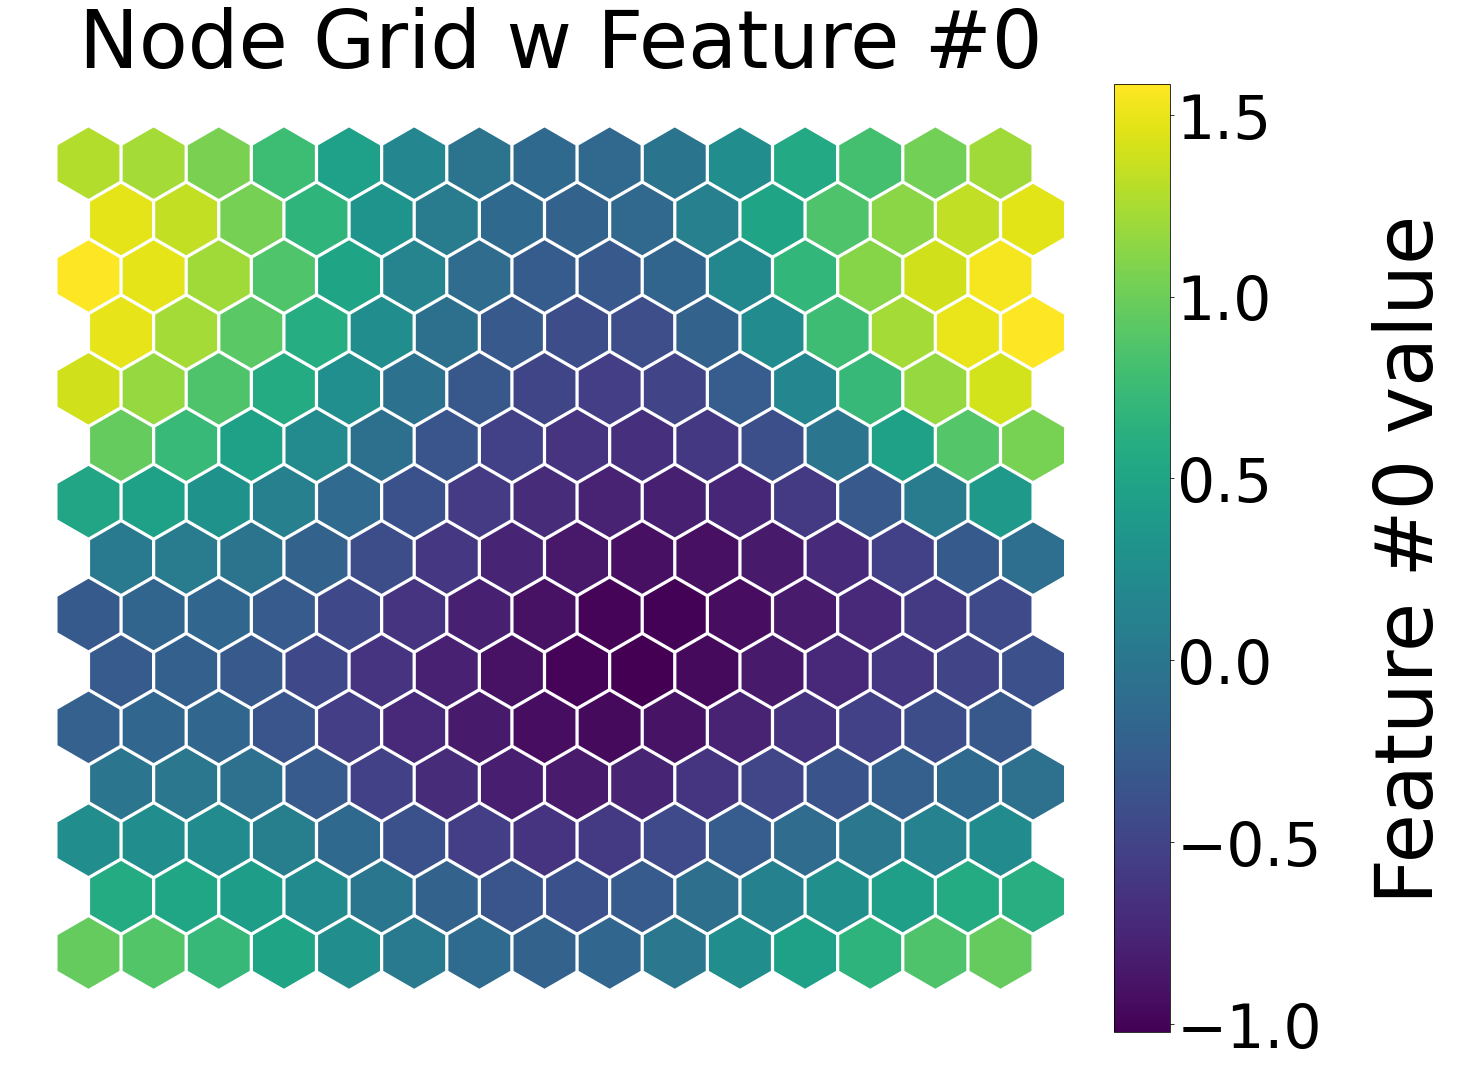

In [52]:
net.nodes_graph(colnum=0)

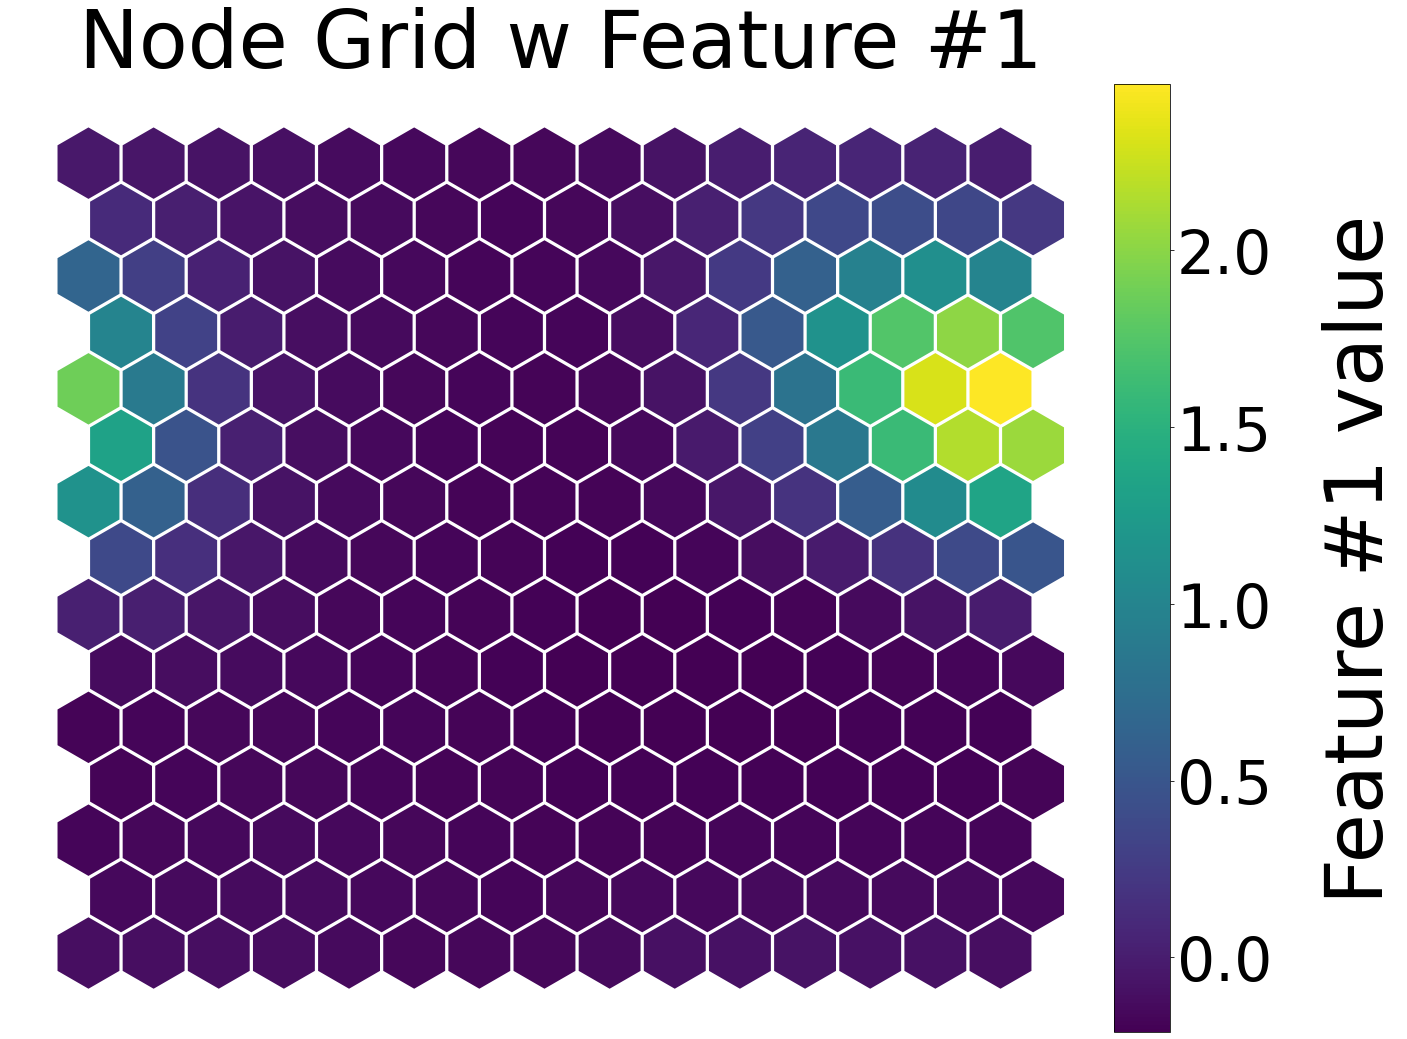

In [53]:
net.nodes_graph(colnum=1)

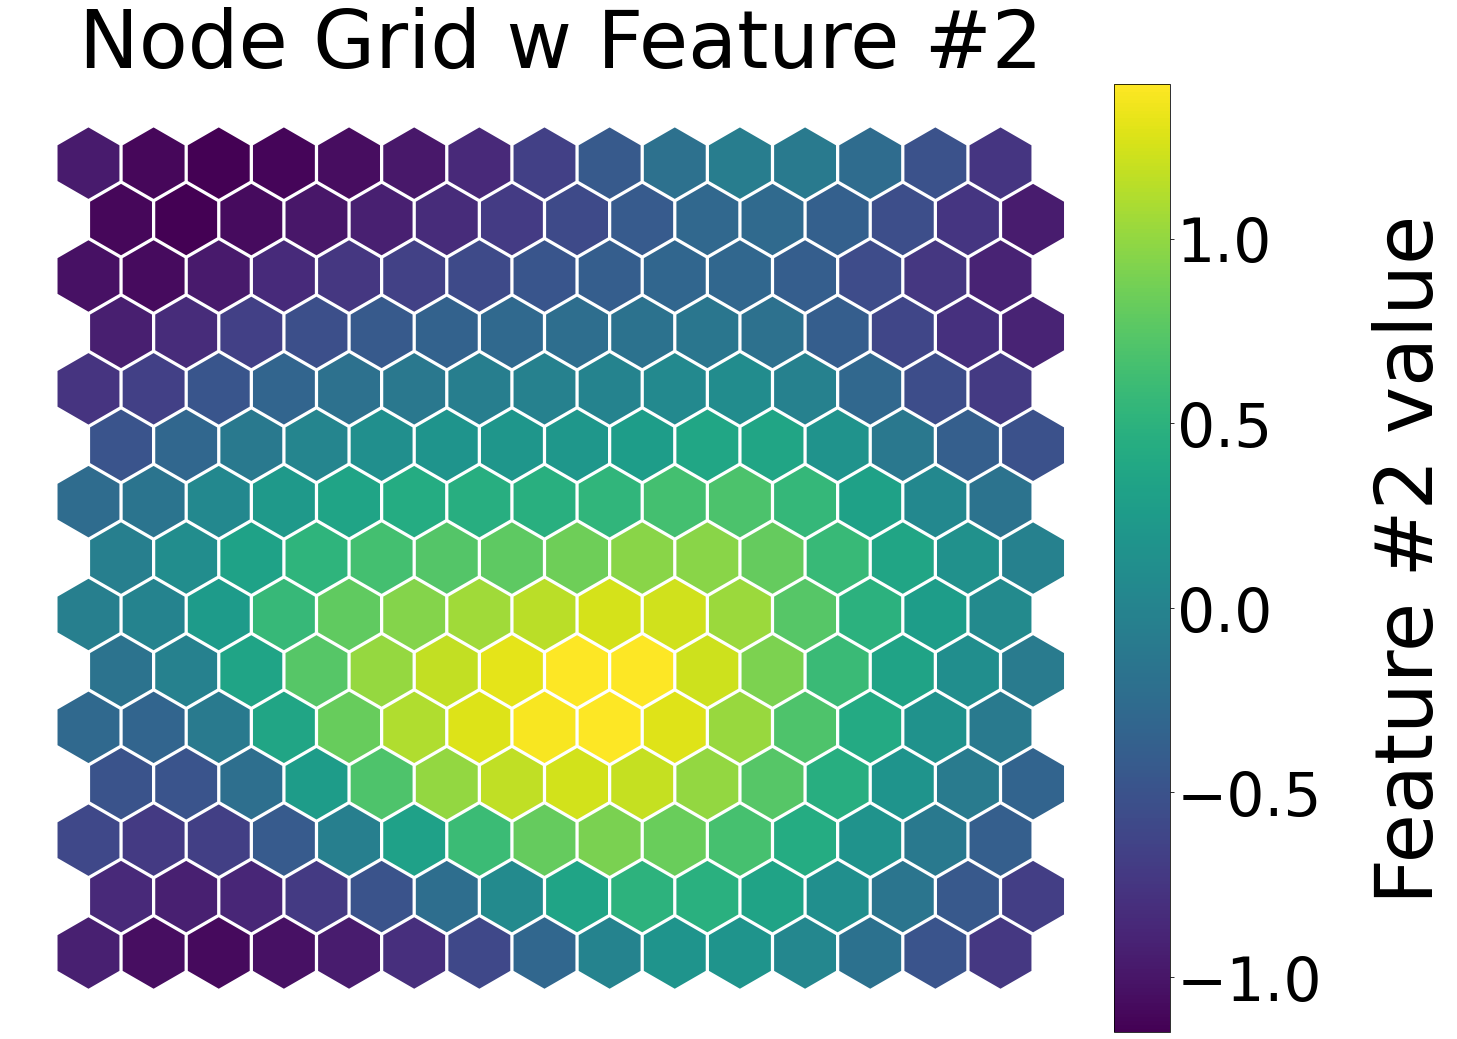

In [54]:
net.nodes_graph(colnum=2)

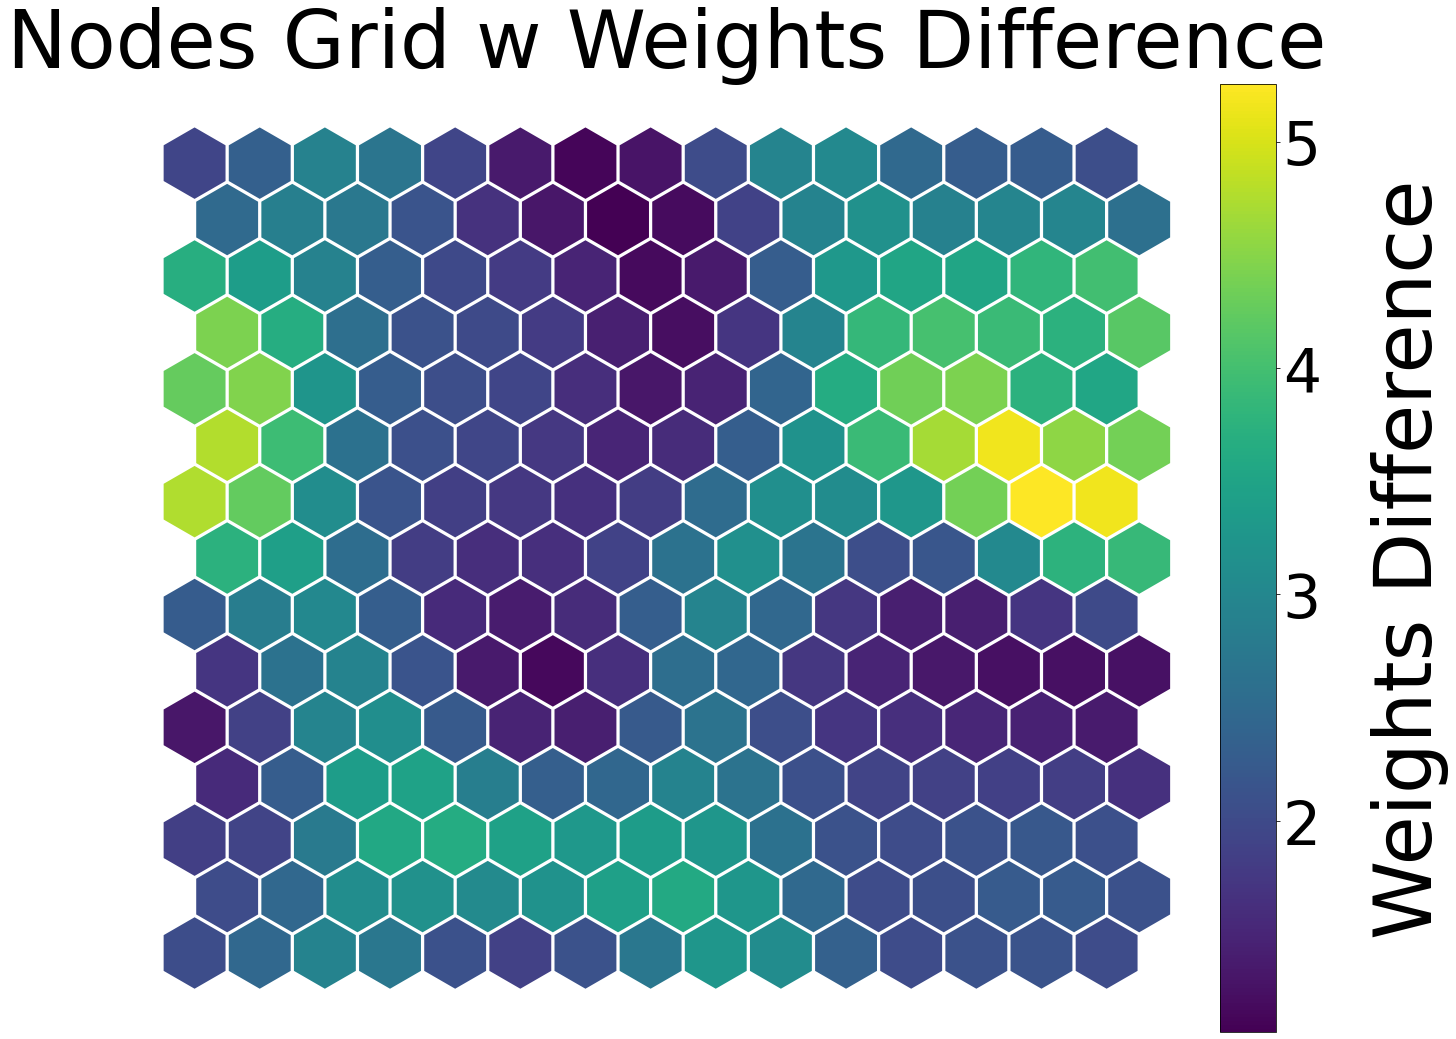

In [55]:
net.diff_graph()

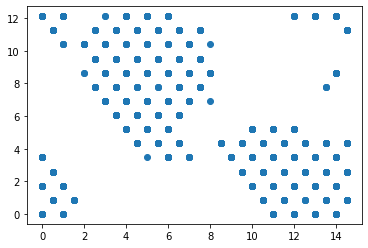

In [56]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [57]:
# Применяем к-минс для нашей карты
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(prj)

In [58]:
# Importing km clusters
import pickle
input = open('clust-km.pkl', 'rb')
obj = pickle.load(input)
input.close()
km = obj["km"]

In [59]:
# Сопоставляем резульаты полученые К-минс с нашей картой. % совпадений составил 52%.
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

0.5257325176551818

In [ ]:
#Выводы. Полученные выводы. После подготовки наших данных к работе, мы использовали два разных метода для определения количества кластеров , это метод локтя и силуэта. По полученным значнеиям было приянто использовать 4 кластера. После чего отобрали необходимые нам переменные и получили готовые 4 кластера: 1) вино с низким значением fixed acidity, низким значением density и высоким значением pH обладает высоким качеством; 2) вино с низким значением fixed acidity, низким значением density и низким значением pH обладает низким качеством; 3) вино с низким значением fixed acidity, низким значением density и низким значением pH обладает низким качеством; 4) вино с высоким значением fixed acidity, высоким значением density и низким значением pH обладает высоким качеством. Затем построили карты для визуального определеняи наших кластеров. На карте можно выделить относительно четкие 4 кластера. Конечный итог сопоставления полученных результатов разными методами составил 73% совпадения.  

In [ ]:
#Были проведены различные эксперементы с параметрами карты, однако лучшего результата добиться не удалось, повышалось % совпадений, однако четкость кластеров падало.